In [12]:
# Importing the libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Loading the dataset
df = pd.read_csv("NBA Player Stats and Salaries_2010-2025.csv")
df.head()

,Player,Salary,Year,Pos,Age,Team,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Kobe Bryant,23034375,2010,SG,31,LAL,73,73,38.8,9.8,...,0.811,1.1,4.3,5.4,5.0,1.5,0.3,3.2,2.6,27.0
1,Jermaine O'Neal,23016000,2010,C,31,MIA,70,70,28.4,5.6,...,0.720,1.8,5.2,6.9,1.3,0.4,1.4,1.8,3.0,13.6
2,Tracy McGrady,22843124,2010,SG,30,NYK,30,24,22.4,3.0,...,0.746,0.7,2.4,3.1,3.3,0.5,0.5,1.5,1.3,8.2
3,Tim Duncan,22183220,2010,C,33,SAS,78,77,31.3,7.2,...,0.725,2.8,7.3,10.1,3.2,0.6,1.5,1.8,1.9,17.9
4,Shaquille O'Neal,21000000,2010,C,37,CLE,53,53,23.4,4.9,...,0.496,1.8,4.9,6.7,1.5,0.3,1.2,2.0,3.2,12.0


In [16]:
#Checking the Structure
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7298 entries, 0 to 7297
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  7298 non-null   object 
 1   Salary  7298 non-null   int64  
 2   Year    7298 non-null   int64  
 3   Pos     7298 non-null   object 
 4   Age     7298 non-null   int64  
 5   Team    7298 non-null   object 
 6   G       7298 non-null   int64  
 7   GS      7298 non-null   int64  
 8   MP      7298 non-null   float64
 9   FG      7298 non-null   float64
 10  FGA     7298 non-null   float64
 11  FG%     7278 non-null   float64
 12  3P      7298 non-null   float64
 13  3PA     7298 non-null   float64
 14  3P%     6713 non-null   float64
 15  2P      7298 non-null   float64
 16  2PA     7298 non-null   float64
 17  2P%     7253 non-null   float64
 18  eFG%    7278 non-null   float64
 19  FT      7298 non-null   float64
 20  FTA     7298 non-null   float64
 21  FT%     7096 non-null   float64
 22  

Index(['Player', 'Salary', 'Year', 'Pos', 'Age', 'Team', 'G', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT',
       'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS'],
      dtype='object')

In [104]:
# Cleaning the dataset
df['Salary'] = df['Salary'].replace('[\$,]','', regex = True).astype(float)

# Check for nulls
print(df_grouped[['Salary', 'PTS', 'AST', 'TRB']].isnull().sum())

# Drop rows with missing data
df_clean = df_grouped[['Salary', 'PTS', 'AST', 'TRB']].dropna()
df_clean = df[df['Salary'] > 0]  # Filter out zero or null salaries

Salary    0
PTS       0
AST       0
TRB       0
dtype: int64


In [106]:
df_grouped = df.groupby(['Player', 'Year'], as_index=False).agg({
    'Salary': 'max',
    'PTS': 'mean',
    'TRB': 'mean',
    'AST': 'mean'
})

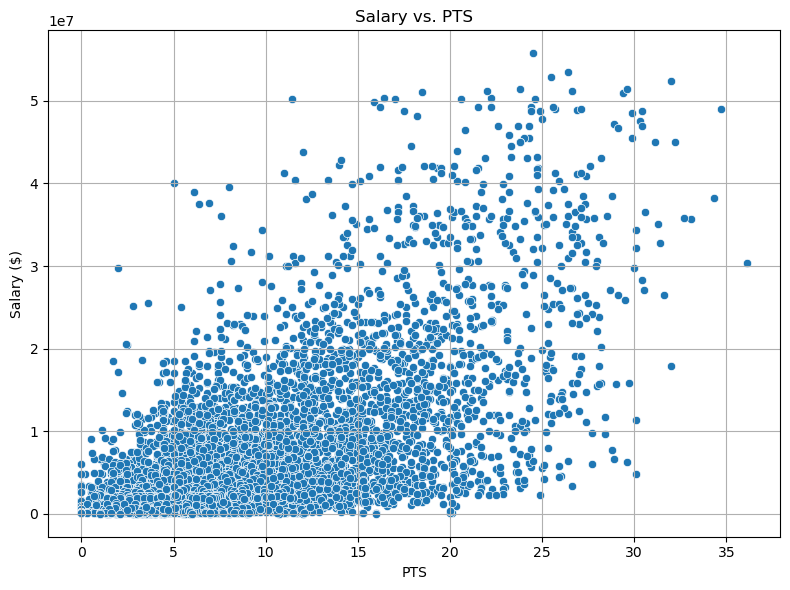

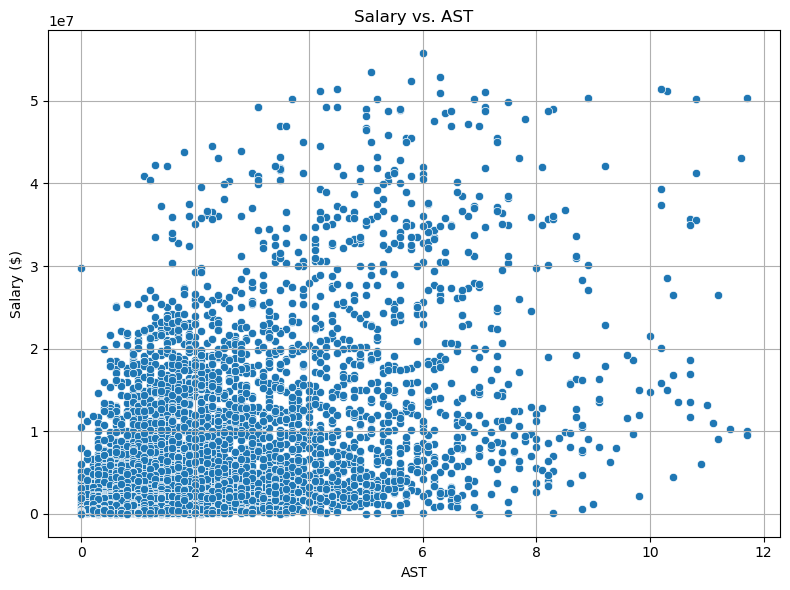

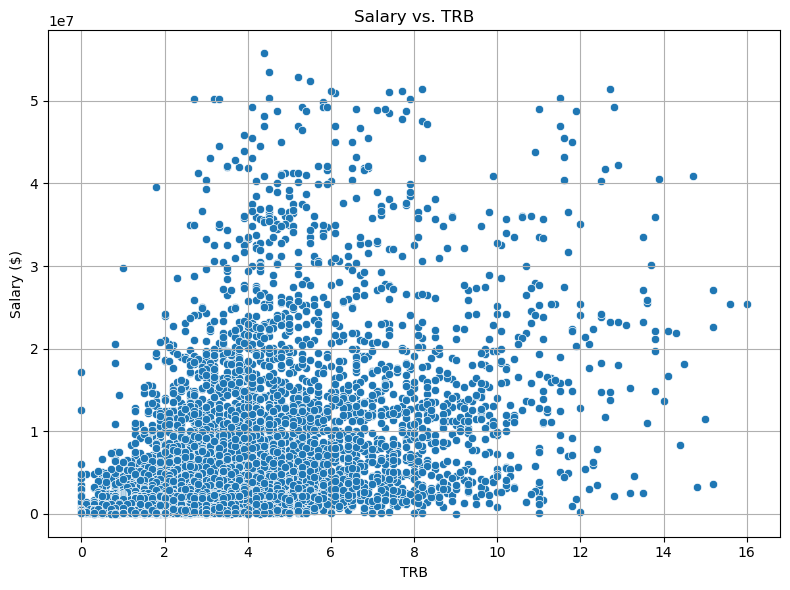

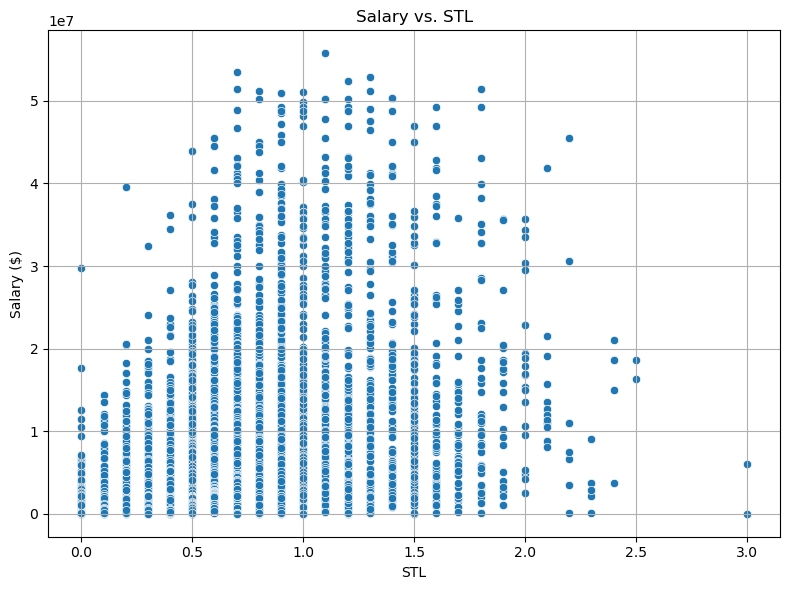

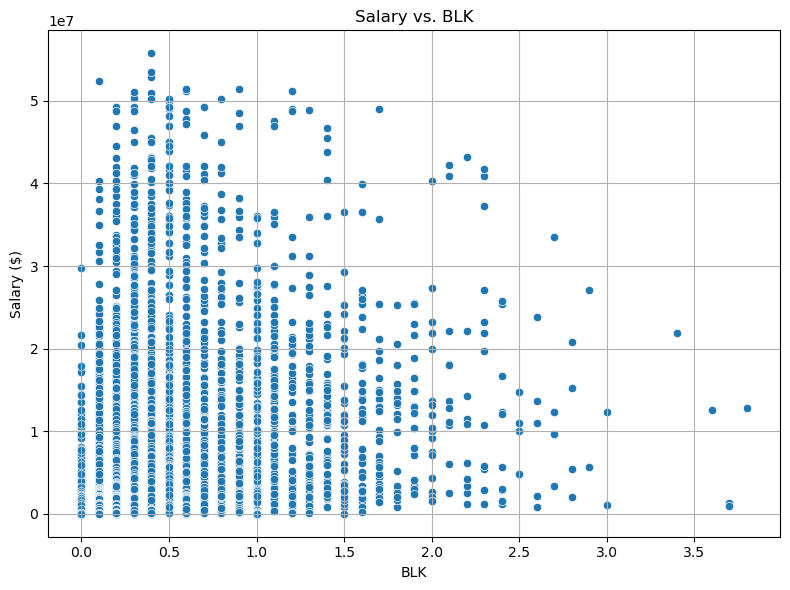

In [129]:
stats = ['PTS', 'AST', 'TRB', 'STL', 'BLK']
for stat in stats:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=stat, y='Salary')
    plt.title(f'Salary vs. {stat}')
    plt.xlabel(stat)
    plt.ylabel('Salary ($)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

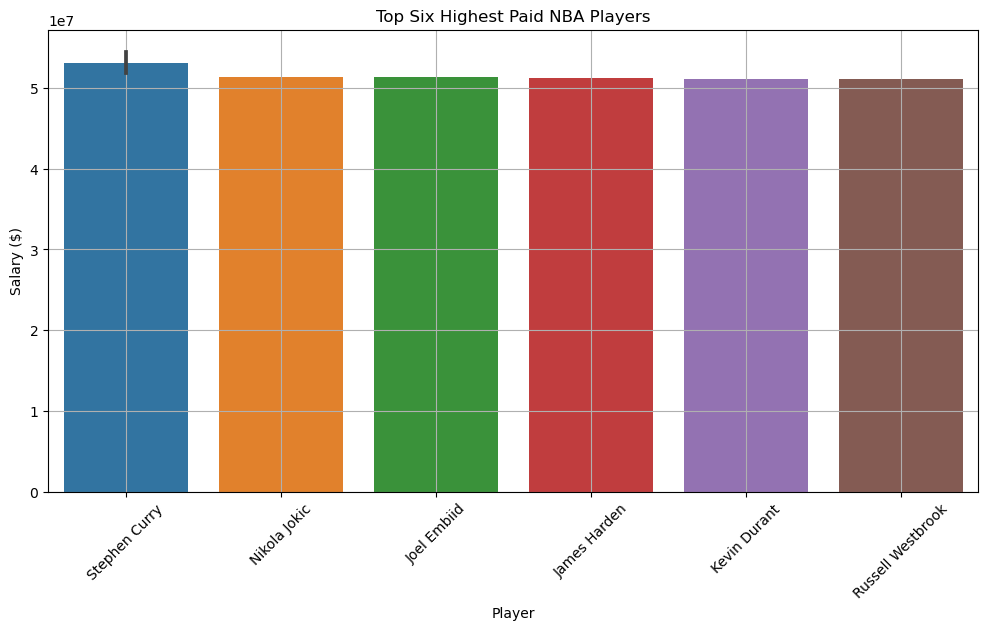

In [111]:
top_salary = df_grouped.sort_values('Salary', ascending=False)
top_salary = top_salary[top_salary['Salary'].notnull()].head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_salary, x='Player', y='Salary')
plt.title(f'Top Six Highest Paid NBA Players')
plt.xlabel('Player')
plt.ylabel('Salary ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [113]:
print("Total players in grouped data:", df_grouped['Player'].nunique())
print("Top rows by salary:")
print(df_grouped.sort_values('Salary', ascending=False).head(15)[['Player', 'Salary']])

Total players in grouped data: 1658
Top rows by salary:
                 Player      Salary
6429      Stephen Curry  55761216.0
6428      Stephen Curry  53458234.0
6426      Stephen Curry  52938707.0
6425      Stephen Curry  52411485.0
5405       Nikola Jokic  51415938.0
3545        Joel Embiid  51415938.0
3049       James Harden  51238730.0
4152       Kevin Durant  51179021.0
6098  Russell Westbrook  51123449.0
6427      Stephen Curry  50968059.0
6097  Russell Westbrook  50403633.0
1153         Chris Paul  50403633.0
3048       James Harden  50277018.0
3615          John Wall  50277018.0
684        Bradley Beal  50203930.0


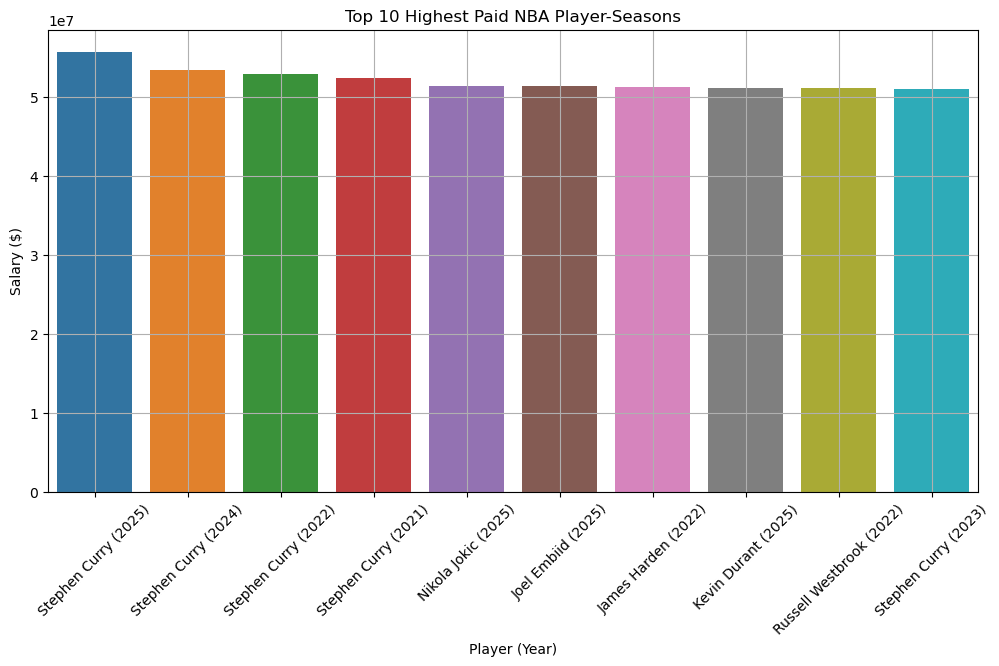

In [115]:
# Combine player name and season for uniqueness
df_grouped['Player_Season'] = df_grouped['Player'] + " (" + df_grouped['Year'].astype(str) + ")"

# Sort and take top 10 unique player-seasons
top_salary = df_grouped.sort_values('Salary', ascending=False).head(10)

# Plot with combined label
plt.figure(figsize=(12, 6))
sns.barplot(data=top_salary, x='Player_Season', y='Salary')
plt.title('Top 10 Highest Paid NBA Player-Seasons')
plt.xlabel('Player (Year)')
plt.ylabel('Salary ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

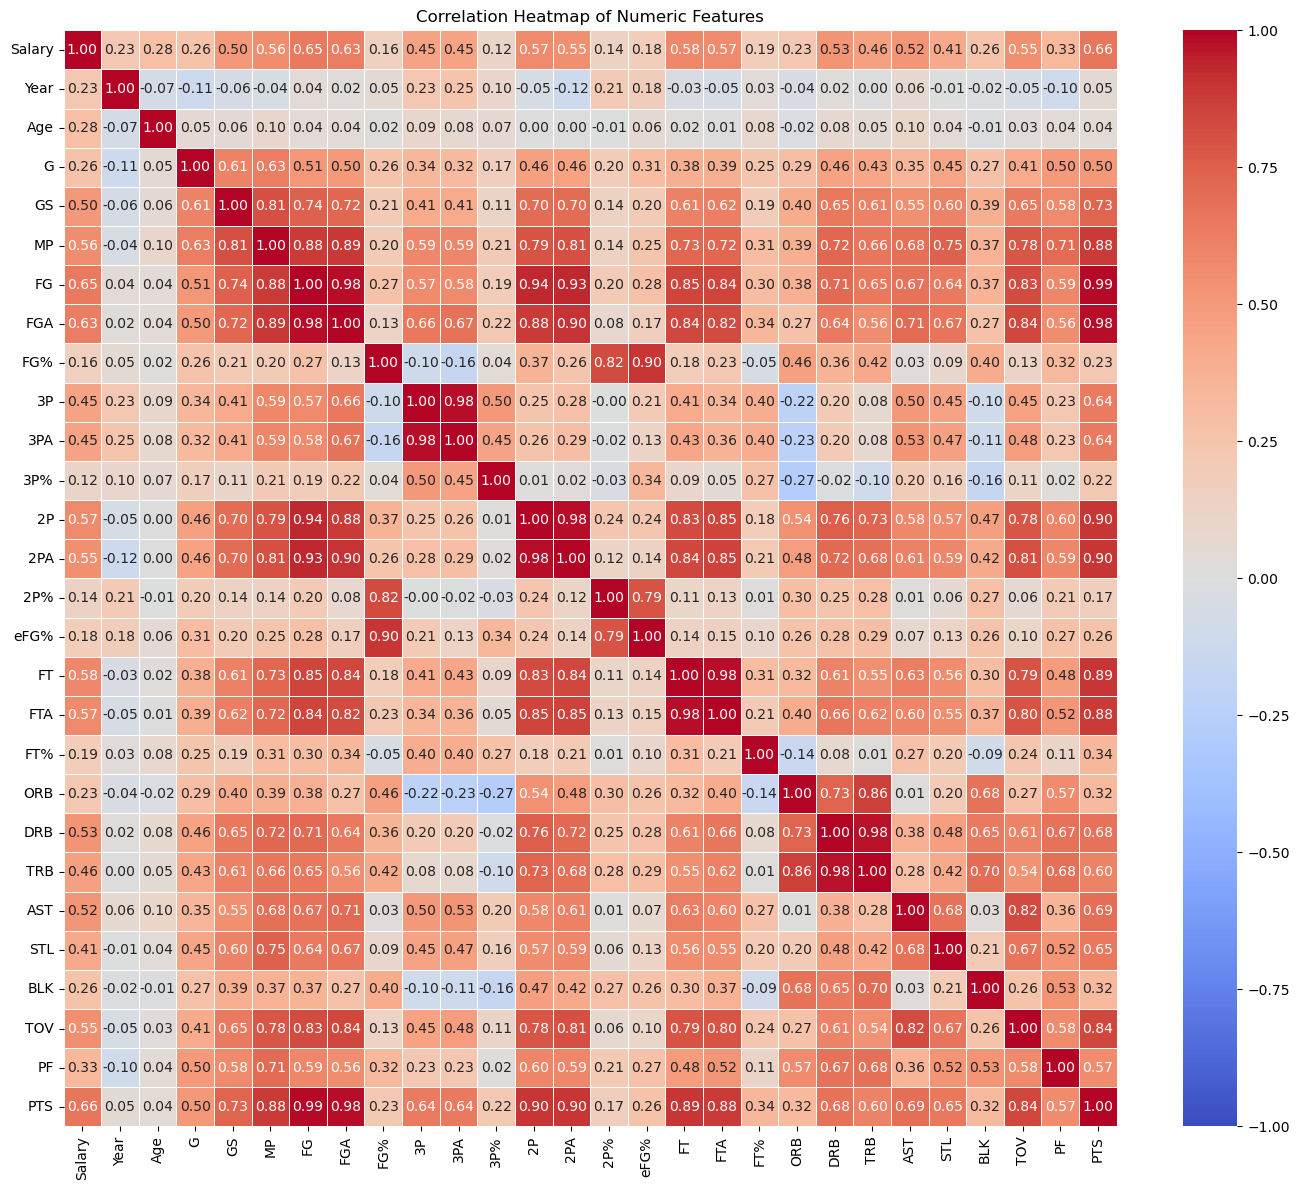

In [132]:
numeric_cols = df.select_dtypes(include='number').columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

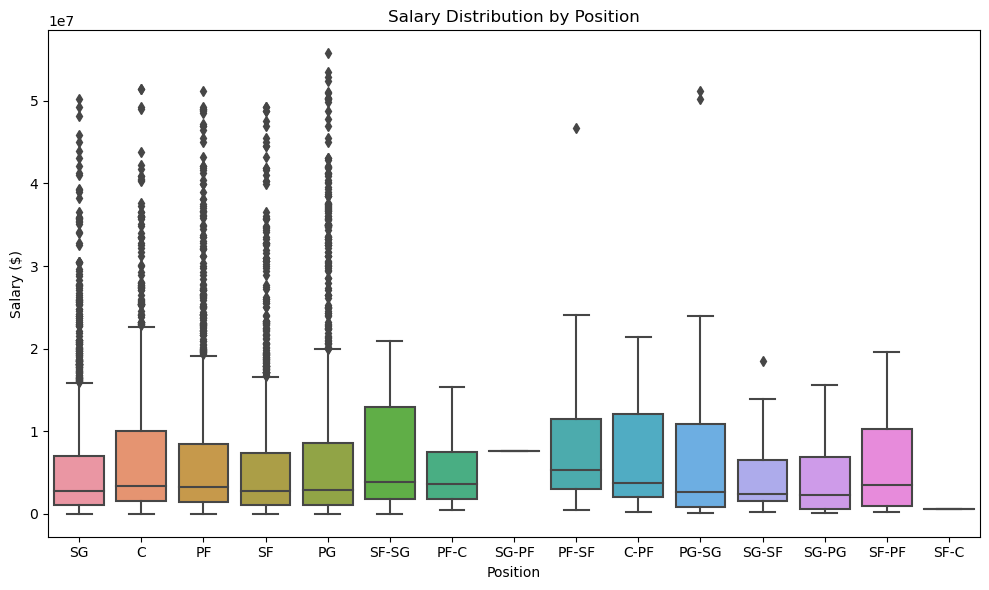

In [127]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pos', y='Salary')
plt.title('Salary Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Salary ($)')
plt.tight_layout()
plt.show()

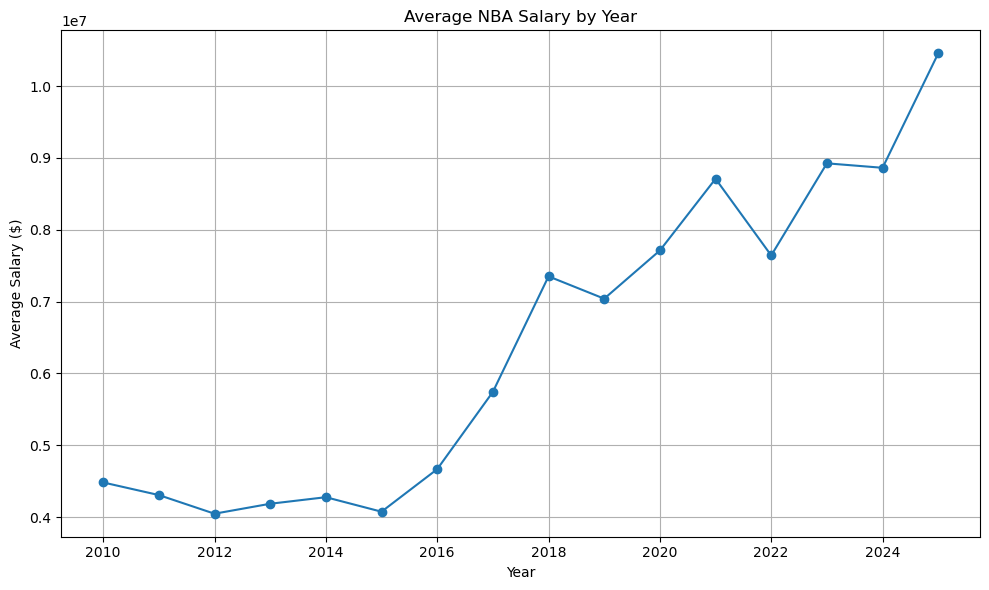

In [137]:
salary_by_year = df.groupby('Year')['Salary'].mean()

plt.figure(figsize=(10, 6))
salary_by_year.plot(marker='o')
plt.title('Average NBA Salary by Year')
plt.xlabel('Year')
plt.ylabel('Average Salary ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

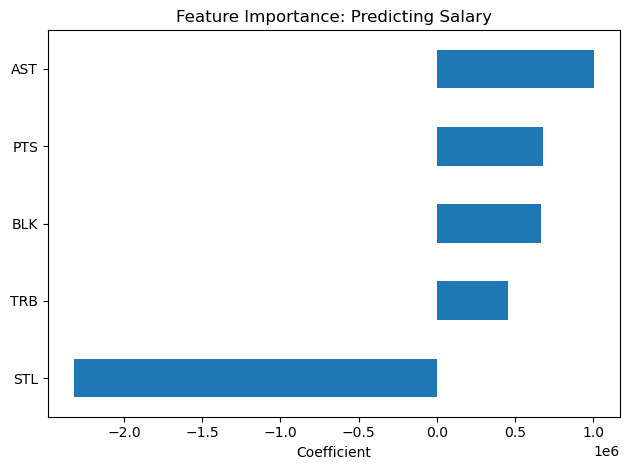

In [139]:
from sklearn.linear_model import LinearRegression

features = ['PTS', 'AST', 'TRB', 'STL', 'BLK']
X = df[features]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)

pd.Series(model.coef_, index=features).sort_values().plot(kind='barh')
plt.title('Feature Importance: Predicting Salary')
plt.xlabel('Coefficient')
plt.tight_layout()
plt.show()

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
features = ['PTS', 'AST', 'TRB', 'STL', 'BLK']
X = df[features]
y = df['Salary']

# Drop rows with missing values in selected features or target
model_data = df[features + ['Salary']].dropna()
X = model_data[features]
y = model_data['Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [143]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)


In [145]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:,.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 35,371,949,668,800.63
R² Score: 0.4867


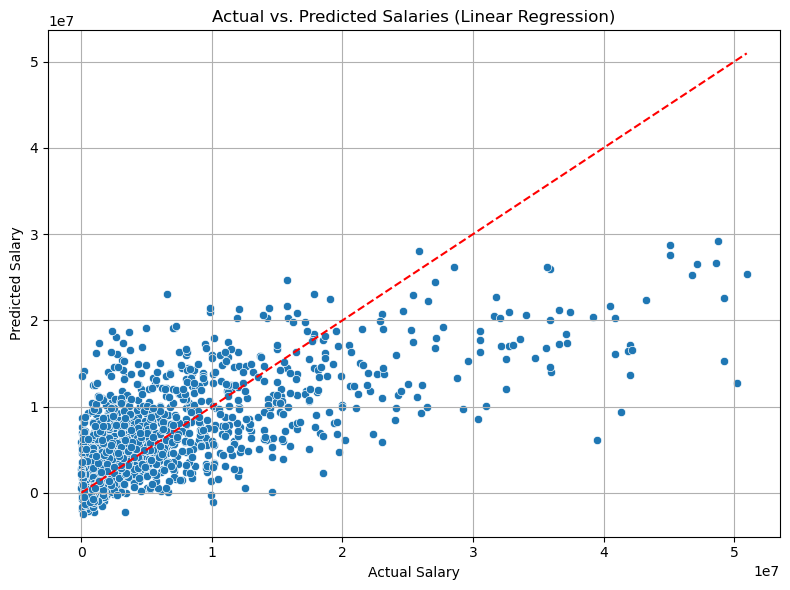

In [147]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Salaries (Linear Regression)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.tight_layout()
plt.show()


In [149]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)


In [151]:
from sklearn.metrics import mean_squared_error, r2_score

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest - Mean Squared Error: {rf_mse:,.2f}")
print(f"Random Forest - R² Score: {rf_r2:.4f}")


Random Forest - Mean Squared Error: 37,053,446,246,603.62
Random Forest - R² Score: 0.4623


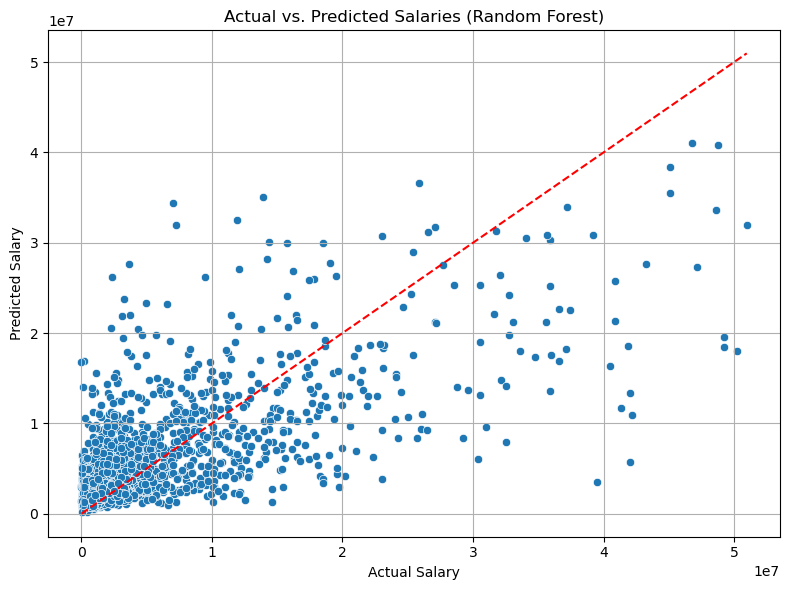

In [153]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Salaries (Random Forest)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.tight_layout()
plt.show()


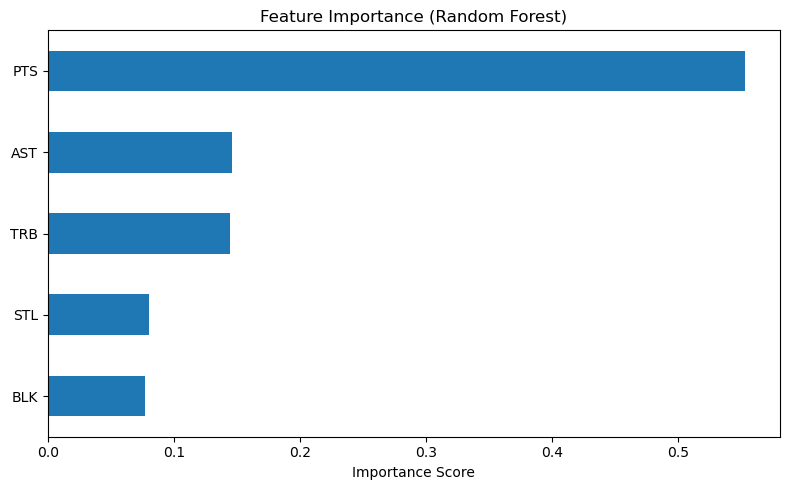

In [155]:
importances = pd.Series(rf_model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(8, 5))
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [159]:
# Linear Regression
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Random Forest
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Display Results
print("📉 Model Comparison Metrics:")
print(f"Linear Regression  →  MSE: {lr_mse:,.0f} | R²: {lr_r2:.4f}")
print(f"Random Forest      →  MSE: {rf_mse:,.0f} | R²: {rf_r2:.4f}")


📉 Model Comparison Metrics:
Linear Regression  →  MSE: 35,371,949,668,801 | R²: 0.4867
Random Forest      →  MSE: 37,053,446,246,604 | R²: 0.4623


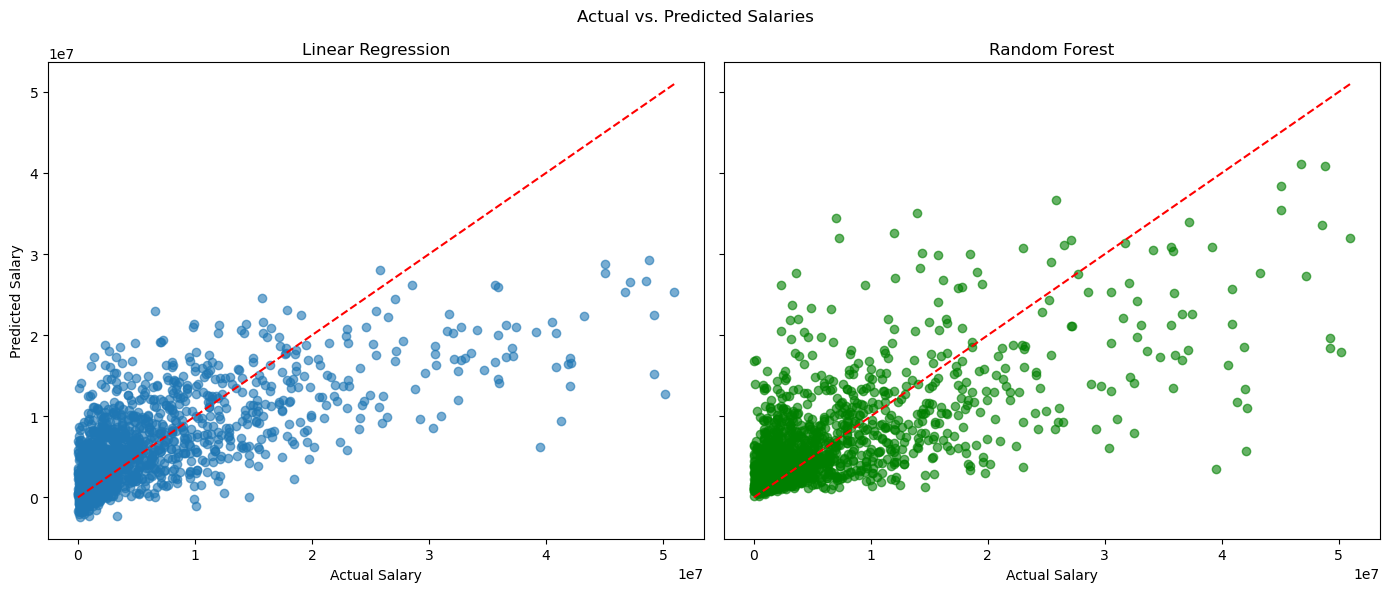

In [161]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Linear
axs[0].scatter(y_test, lr_pred, alpha=0.6)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axs[0].set_title('Linear Regression')
axs[0].set_xlabel('Actual Salary')
axs[0].set_ylabel('Predicted Salary')

# Random Forest
axs[1].scatter(y_test, rf_pred, alpha=0.6, color='green')
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
axs[1].set_title('Random Forest')
axs[1].set_xlabel('Actual Salary')

plt.suptitle('Actual vs. Predicted Salaries')
plt.tight_layout()
plt.show()


In [163]:
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [lr_mse, rf_mse],
    'R² Score': [lr_r2, rf_r2]
})

print(comparison_df)


               Model           MSE  R² Score
0  Linear Regression  3.537195e+13  0.486689
1      Random Forest  3.705345e+13  0.462287


In [165]:
import numpy as np

# Drop rows with missing values
model_data = df[['PTS', 'AST', 'TRB', 'STL', 'BLK', 'Salary']].dropna()

# Log-transform the target
model_data['LogSalary'] = np.log1p(model_data['Salary'])  # log1p handles 0 salaries safely

# Features and target
X = model_data[['PTS', 'AST', 'TRB', 'STL', 'BLK']]
y_log = model_data['LogSalary']


In [167]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)


In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_log)
lr_log_pred = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_log)
rf_log_pred = rf_model.predict(X_test)


In [171]:
# Convert back from log scale
y_test_actual = np.expm1(y_test_log)  # actual salaries
lr_pred_actual = np.expm1(lr_log_pred)
rf_pred_actual = np.expm1(rf_log_pred)


In [173]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr_mse = mean_squared_error(y_test_actual, lr_pred_actual)
lr_r2 = r2_score(y_test_actual, lr_pred_actual)

# Random Forest
rf_mse = mean_squared_error(y_test_actual, rf_pred_actual)
rf_r2 = r2_score(y_test_actual, rf_pred_actual)

# Print results
print("📉 Log-Transformed Model Results:")
print(f"Linear Regression  →  MSE: {lr_mse:,.0f} | R²: {lr_r2:.4f}")
print(f"Random Forest      →  MSE: {rf_mse:,.0f} | R²: {rf_r2:.4f}")


📉 Log-Transformed Model Results:
Linear Regression  →  MSE: 43,321,681,617,368 | R²: 0.3713
Random Forest      →  MSE: 40,669,293,488,673 | R²: 0.4098


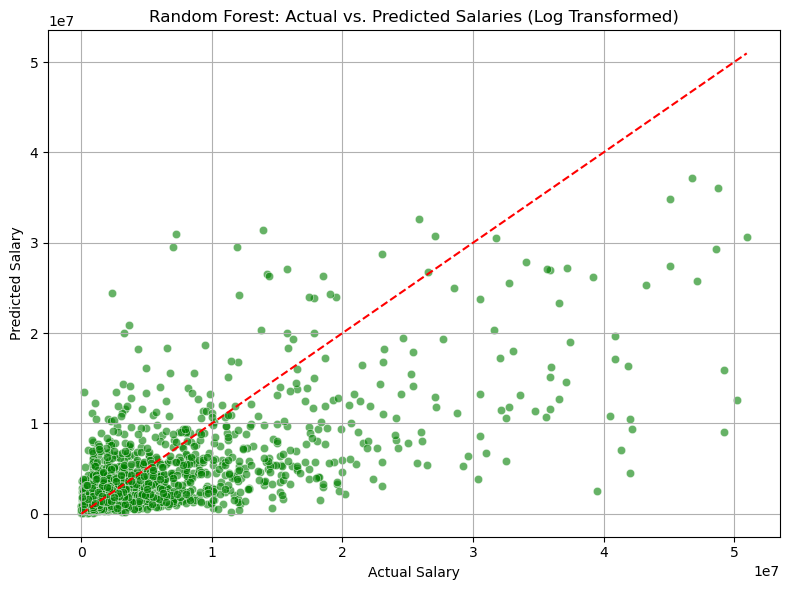

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_actual, y=rf_pred_actual, alpha=0.6, color='green')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], color='red', linestyle='--')
plt.title('Random Forest: Actual vs. Predicted Salaries (Log Transformed)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.grid(True)
plt.tight_layout()
plt.show()


In [177]:
# Define features to use
all_features = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'Age', 'G', 'MP', 'FG%', '3P%', 'FT%', 'Pos', 'Salary']

# Keep rows with no missing values
model_data = df[all_features].dropna().copy()

# Log-transform salary
model_data['LogSalary'] = np.log1p(model_data['Salary'])


In [179]:
# One-hot encode 'Pos'
model_data_encoded = pd.get_dummies(model_data, columns=['Pos'], drop_first=True)

# Features and target
X = model_data_encoded.drop(['Salary', 'LogSalary'], axis=1)
y_log = model_data_encoded['LogSalary']


In [181]:
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)


In [183]:
# Train models
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_log)
lr_pred_log = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train_log)
rf_pred_log = rf_model.predict(X_test)

# Convert predictions back
y_test_actual = np.expm1(y_test_log)
lr_pred_actual = np.expm1(lr_pred_log)
rf_pred_actual = np.expm1(rf_pred_log)


In [185]:
# MSE and R²
lr_mse = mean_squared_error(y_test_actual, lr_pred_actual)
lr_r2 = r2_score(y_test_actual, lr_pred_actual)

rf_mse = mean_squared_error(y_test_actual, rf_pred_actual)
rf_r2 = r2_score(y_test_actual, rf_pred_actual)

# Output
print("📊 Model Performance with Extra Features:")
print(f"Linear Regression  →  MSE: {lr_mse:,.0f} | R²: {lr_r2:.4f}")
print(f"Random Forest      →  MSE: {rf_mse:,.0f} | R²: {rf_r2:.4f}")


📊 Model Performance with Extra Features:
Linear Regression  →  MSE: 41,088,877,491,683 | R²: 0.4723
Random Forest      →  MSE: 30,171,232,512,114 | R²: 0.6125


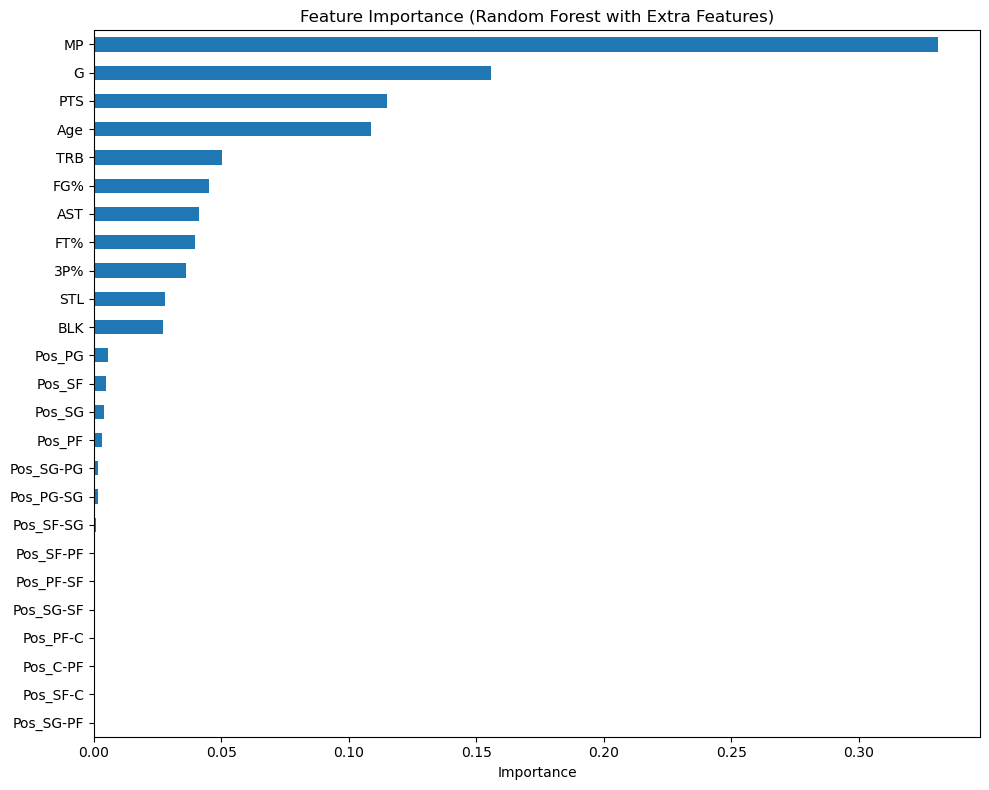

In [187]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance (Random Forest with Extra Features)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


In [189]:
features = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'Age', '3P%', 'FT%', 'FG%', 'Salary']
cluster_data = df[features].dropna().copy()


In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)


In [193]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

cluster_data['Tier'] = clusters


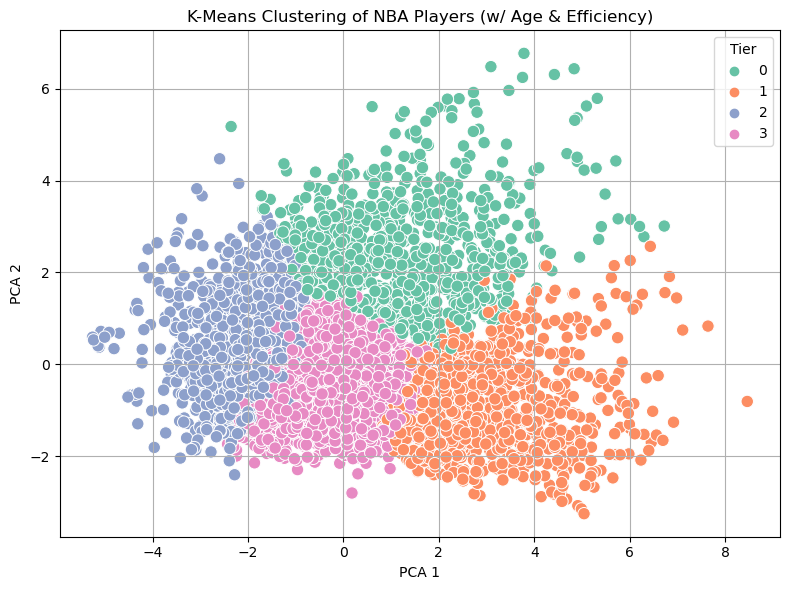

In [195]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
cluster_data['PC1'] = pca_result[:, 0]
cluster_data['PC2'] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cluster_data, x='PC1', y='PC2', hue='Tier', palette='Set2', s=80)
plt.title('K-Means Clustering of NBA Players (w/ Age & Efficiency)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [197]:
summary = cluster_data.groupby('Tier')[features].mean().round(2)
print("📈 Cluster Tier Averages:")
print(summary)


📈 Cluster Tier Averages:
        PTS   AST   TRB   STL   BLK    Age   3P%   FT%   FG%       Salary
Tier                                                                     
0     10.93  1.56  7.13  0.70  1.09  25.92  0.17  0.69  0.54   8226624.20
1     18.74  5.22  5.21  1.21  0.47  27.18  0.35  0.81  0.46  19401079.98
2      3.57  0.84  1.86  0.34  0.20  24.39  0.24  0.65  0.40   1860728.31
3      8.65  1.92  3.15  0.69  0.30  26.99  0.36  0.79  0.44   4824572.96


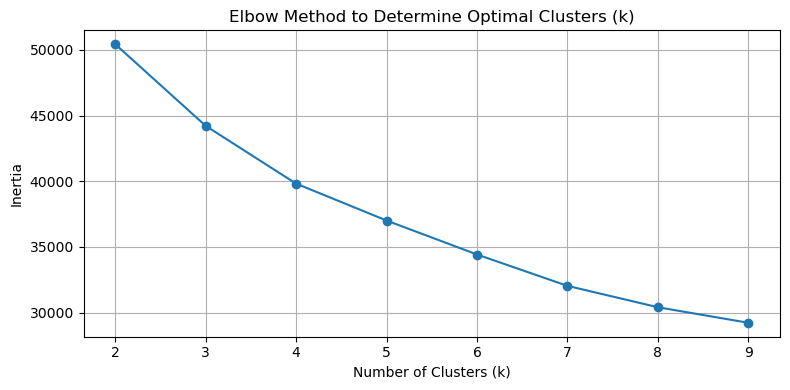

In [199]:
inertias = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertias.append(km.inertia_)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()


In [201]:
final_k = 4  # or change based on elbow plot
kmeans = KMeans(n_clusters=final_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

cluster_data['Tier'] = clusters


In [203]:
# Map tiers manually (based on summary stats later)
tier_names = {
    0: "Star Tier",
    1: "Efficient Veterans",
    2: "Developing Players",
    3: "Bench/Low Usage"
}
cluster_data['TierLabel'] = cluster_data['Tier'].map(tier_names)


In [207]:
# Merge with player name, team, and position if available
player_info = df[['Player', 'Team', 'Pos']].copy()
clustered_df = pd.concat([player_info, cluster_data], axis=1)


In [209]:
summary = clustered_df.groupby('TierLabel')[features].agg(['mean', 'count']).round(2)
print("📋 Tier Summary (Averages and Counts):")
print(summary)


📋 Tier Summary (Averages and Counts):
                      PTS         AST         TRB         STL         BLK  \
                     mean count  mean count  mean count  mean count  mean   
TierLabel                                                                   
Bench/Low Usage      8.65  2940  1.92  2940  3.15  2940  0.69  2940  0.30   
Developing Players   3.57  1688  0.84  1688  1.86  1688  0.34  1688  0.20   
Efficient Veterans  18.74  1047  5.22  1047  5.21  1047  1.21  1047  0.47   
Star Tier           10.93   909  1.56   909  7.13   909  0.70   909  1.09   

                            Age         3P%         FT%         FG%        \
                   count   mean count  mean count  mean count  mean count   
TierLabel                                                                   
Bench/Low Usage     2940  26.99  2940  0.36  2940  0.79  2940  0.44  2940   
Developing Players  1688  24.39  1688  0.24  1688  0.65  1688  0.40  1688   
Efficient Veterans  1047  27.18  1047

In [211]:
# Compare only Star and Veteran tiers
compare = clustered_df[clustered_df['TierLabel'].isin(['Star Tier', 'Efficient Veterans'])]

# Compute mean stats per group
comparison_stats = compare.groupby('TierLabel')[['PTS', 'AST', 'TRB', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'Age', 'Salary']].mean().round(2)

print("📊 Comparison: Star Tier vs. Efficient Veterans")
print(comparison_stats.T)


📊 Comparison: Star Tier vs. Efficient Veterans
TierLabel  Efficient Veterans   Star Tier
PTS                     18.74       10.93
AST                      5.22        1.56
TRB                      5.21        7.13
STL                      1.21        0.70
BLK                      0.47        1.09
FG%                      0.46        0.54
3P%                      0.35        0.17
FT%                      0.81        0.69
Age                     27.18       25.92
Salary            19401079.98  8226624.20


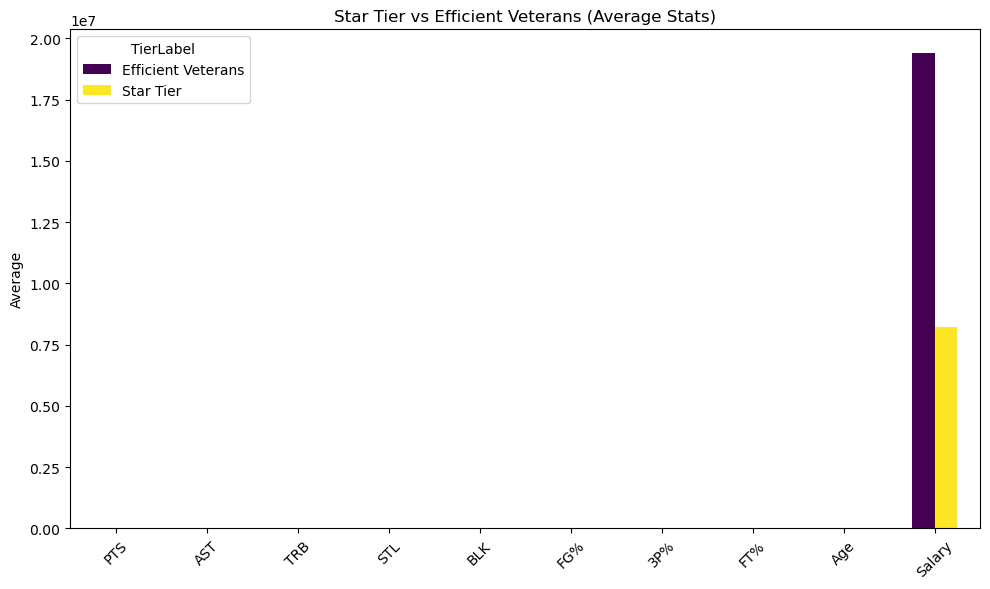

In [213]:
comparison_stats.T.plot(kind='bar', figsize=(10, 6), title='Star Tier vs Efficient Veterans (Average Stats)', colormap='viridis')
plt.ylabel("Average")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [215]:
cluster_means = clustered_df.groupby('Tier')[['PTS', 'AST', 'TRB', 'FG%', '3P%', 'FT%', 'Age', 'Salary']].mean().round(2)
print(cluster_means.sort_values('PTS', ascending=False))


        PTS   AST   TRB   FG%   3P%   FT%    Age       Salary
Tier                                                         
1.0   18.74  5.22  5.21  0.46  0.35  0.81  27.18  19401079.98
0.0   10.93  1.56  7.13  0.54  0.17  0.69  25.92   8226624.20
3.0    8.65  1.92  3.15  0.44  0.36  0.79  26.99   4824572.96
2.0    3.57  0.84  1.86  0.40  0.24  0.65  24.39   1860728.31


In [217]:
# Example based on inspection — change as needed
tier_labels = {
    0: 'Efficient Veterans',
    1: 'Star Tier',
    2: 'Young Role Players',
    3: 'Bench/Low Usage'
}

clustered_df['TierLabel'] = clustered_df['Tier'].map(tier_labels)


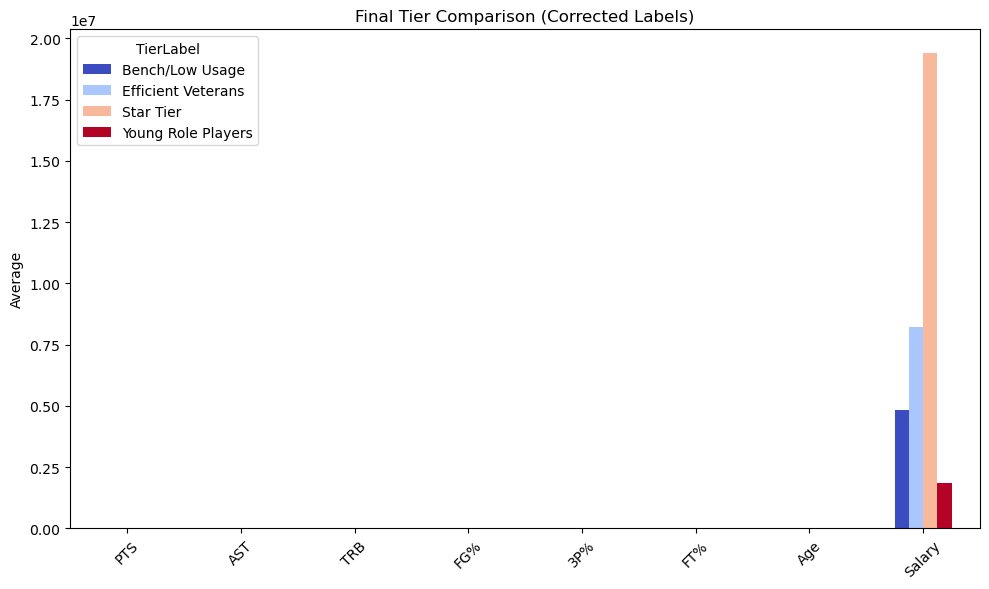

In [219]:
final_compare = clustered_df.groupby('TierLabel')[['PTS', 'AST', 'TRB', 'FG%', '3P%', 'FT%', 'Age', 'Salary']].mean().round(2)
final_compare.T.plot(kind='bar', figsize=(10, 6), title='Final Tier Comparison (Corrected Labels)', colormap='coolwarm')
plt.ylabel("Average")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [227]:
# Avoid division by zero
clustered_df['Salary'] = clustered_df['Salary'].replace(0, np.nan)

# Value Index: simple sum of key stats divided by salary
clustered_df['ValueIndex'] = (
    (clustered_df['PTS'] + clustered_df['AST'] + clustered_df['TRB']) / clustered_df['Salary']
).round(4)

# Preview top value players
top_value = clustered_df.sort_values('ValueIndex', ascending=False)[['Player', 'TierLabel', 'PTS', 'AST', 'TRB', 'Salary', 'ValueIndex']].head(10)
print("💰 Top 10 Value Players:")
print(top_value)


💰 Top 10 Value Players:
              Player           TierLabel   PTS  AST  TRB   Salary  ValueIndex
6314    RaiQuan Gray  Efficient Veterans  16.0  7.0  9.0   6201.0      0.0052
3939   Aaron Jackson  Young Role Players   8.0  1.0  3.0   4608.0      0.0026
6315   Jacob Gilyard           Star Tier   3.0  7.0  4.0   6201.0      0.0023
3537   Dahntay Jones  Young Role Players   9.0  1.0  2.0   5767.0      0.0021
4388     Theo Pinson  Young Role Players   4.5  1.2  2.0   4737.0      0.0016
3938    Andre Ingram     Bench/Low Usage  12.0  3.5  3.0  13824.0      0.0013
7293   Isaiah Mobley     Bench/Low Usage   6.0  5.0  4.0  11997.0      0.0013
2161    Chris Wright  Efficient Veterans   6.0  0.6  2.5   9281.0      0.0010
5848  Melvin Frazier  Young Role Players  10.7  0.3  4.3  15372.0      0.0010
5308   Elijah Bryant  Efficient Veterans  16.0  3.0  6.0  29993.0      0.0008


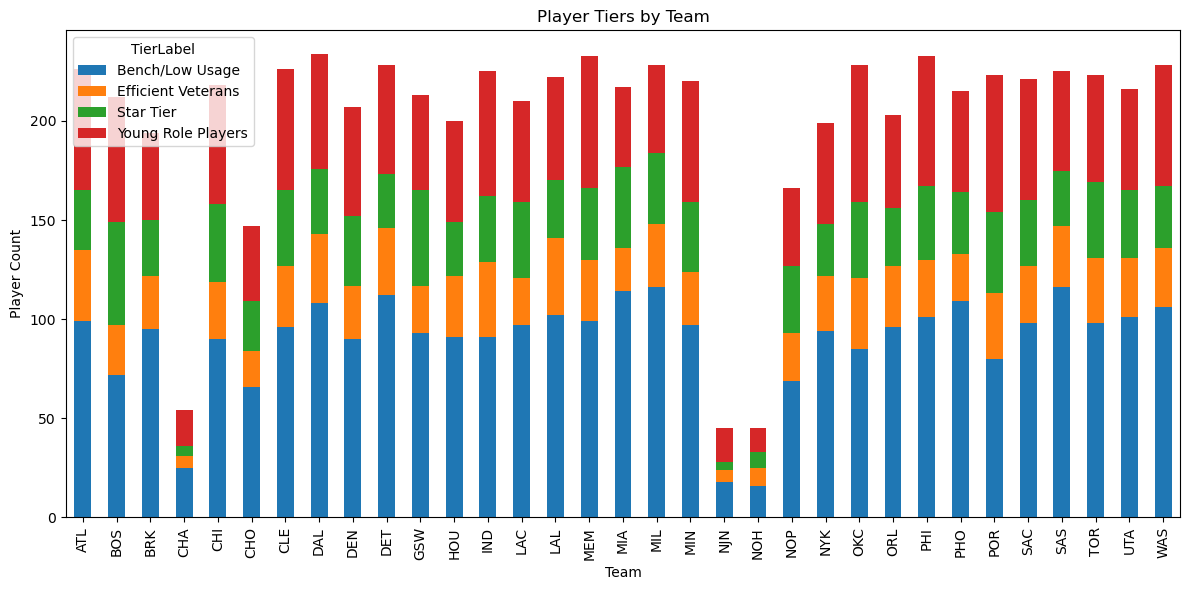

In [225]:
team_tiers = clustered_df.groupby(['Team', 'TierLabel']).size().unstack(fill_value=0)
team_tiers.plot(kind='bar', stacked=True, figsize=(12, 6), title="Player Tiers by Team")
plt.ylabel("Player Count")
plt.tight_layout()
plt.show()


In [229]:
for tier in clustered_df['TierLabel'].unique():
    print(f"\n🔹 Top Value Players in {tier}:")
    top = clustered_df[clustered_df['TierLabel'] == tier].sort_values('ValueIndex', ascending=False)
    print(top[['Player', 'PTS', 'AST', 'TRB', 'Salary', 'ValueIndex']].head(5))



🔹 Top Value Players in Star Tier:
                  Player   PTS  AST  TRB    Salary  ValueIndex
6315       Jacob Gilyard   3.0  7.0  4.0    6201.0      0.0023
5847      Zavier Simpson  11.0  7.5  5.3   43042.0      0.0006
3933      MarShon Brooks  20.1  3.6  3.0   60283.0      0.0004
6301         Skylar Mays  15.3  8.3  3.2  123602.0      0.0002
6296  Shaquille Harrison   8.8  6.0  4.4  142992.0      0.0001

🔹 Top Value Players in Efficient Veterans:
              Player   PTS  AST  TRB   Salary  ValueIndex
6314    RaiQuan Gray  16.0  7.0  9.0   6201.0      0.0052
2161    Chris Wright   6.0  0.6  2.5   9281.0      0.0010
5308   Elijah Bryant  16.0  3.0  6.0  29993.0      0.0008
5307  Cameron Oliver  10.8  1.3  5.3  52489.0      0.0003
4383   Deyonta Davis   4.0  0.6  4.0  25367.0      0.0003

🔹 Top Value Players in Bench/Low Usage:
              Player   PTS  AST  TRB   Salary  ValueIndex
3938    Andre Ingram  12.0  3.5  3.0  13824.0      0.0013
7293   Isaiah Mobley   6.0  5.0  4.0  

In [231]:
# Filter for just the 2025 season
df_2025 = df[df['Year'] == 2025].copy()

# Preview the data
df_2025.head()

,Player,Salary,Year,Pos,Age,Team,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
6809,Stephen Curry,55761216.0,2025,PG,36,GSW,70,70,32.2,8.1,...,0.933,0.6,3.9,4.4,6.0,1.1,0.4,2.9,1.4,24.5
6810,Joel Embiid,51415938.0,2025,C,30,PHI,19,19,30.2,7.4,...,0.882,1.9,6.3,8.2,4.5,0.7,0.9,3.3,2.2,23.8
6811,Nikola Jokic,51415938.0,2025,C,29,DEN,70,70,36.7,11.2,...,0.800,2.9,9.9,12.7,10.2,1.8,0.6,3.3,2.3,29.6
6812,Kevin Durant,51179021.0,2025,PF,36,PHO,62,62,36.5,9.5,...,0.839,0.4,5.7,6.0,4.2,0.8,1.2,3.1,1.7,26.6
6813,Bradley Beal,50203930.0,2025,SG,31,PHO,53,38,32.1,6.5,...,0.803,0.6,2.7,3.3,3.7,1.1,0.5,1.9,2.6,17.0


In [233]:
# Step 2: K-Means Clustering to group players into tiers
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
cluster_features = ['PTS', 'AST', 'TRB', 'FG%', '3P%', 'FT%', 'Age', 'Salary']
df_cluster = df_2025[cluster_features].dropna().copy()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_features)

# Merge cluster labels back to the original 2025 DataFrame
df_2025_clean = df_2025.loc[df_cluster.index].copy()
df_2025_clean['Tier'] = df_cluster['Cluster']

In [235]:
# Step 3: Rename cluster numbers to tier names
tier_names = {
    3: 'Star Tier',
    1: 'Efficient Veterans',
    0: 'Solid Contributors',
    2: 'Role Players'
}

df_2025_clean['TierLabel'] = df_2025_clean['Tier'].map(tier_names)

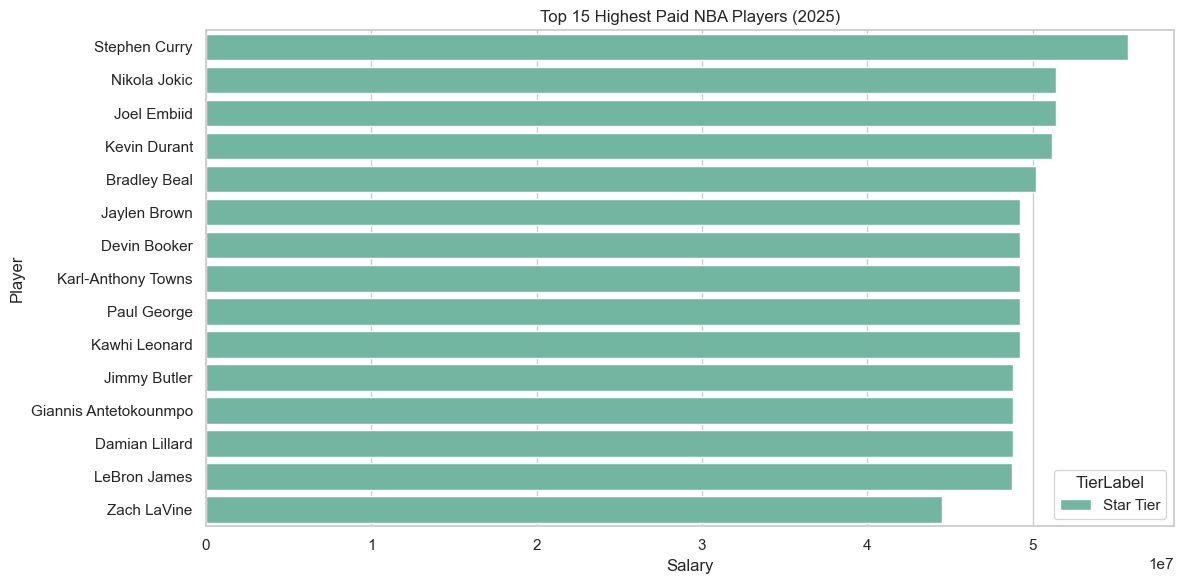

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Get top 15 highest paid players
top_paid = df_2025_clean.sort_values('Salary', ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_paid, x='Salary', y='Player', hue='TierLabel', dodge=False, palette='Set2')
plt.title("Top 15 Highest Paid NBA Players (2025)")
plt.xlabel("Salary")
plt.ylabel("Player")
plt.tight_layout()
plt.show()


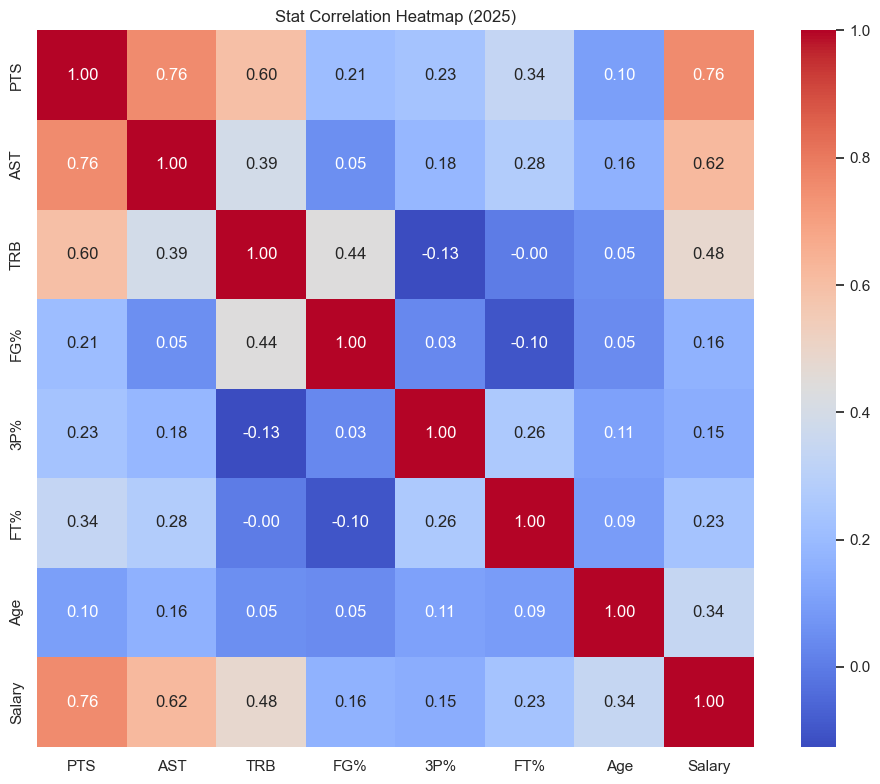

In [239]:
# Step 5: Correlation Heatmap
plt.figure(figsize=(10, 8))

# Choose numeric columns including salary
heatmap_features = ['PTS', 'AST', 'TRB', 'FG%', '3P%', 'FT%', 'Age', 'Salary']
corr = df_2025_clean[heatmap_features].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Stat Correlation Heatmap (2025)")
plt.tight_layout()
plt.show()


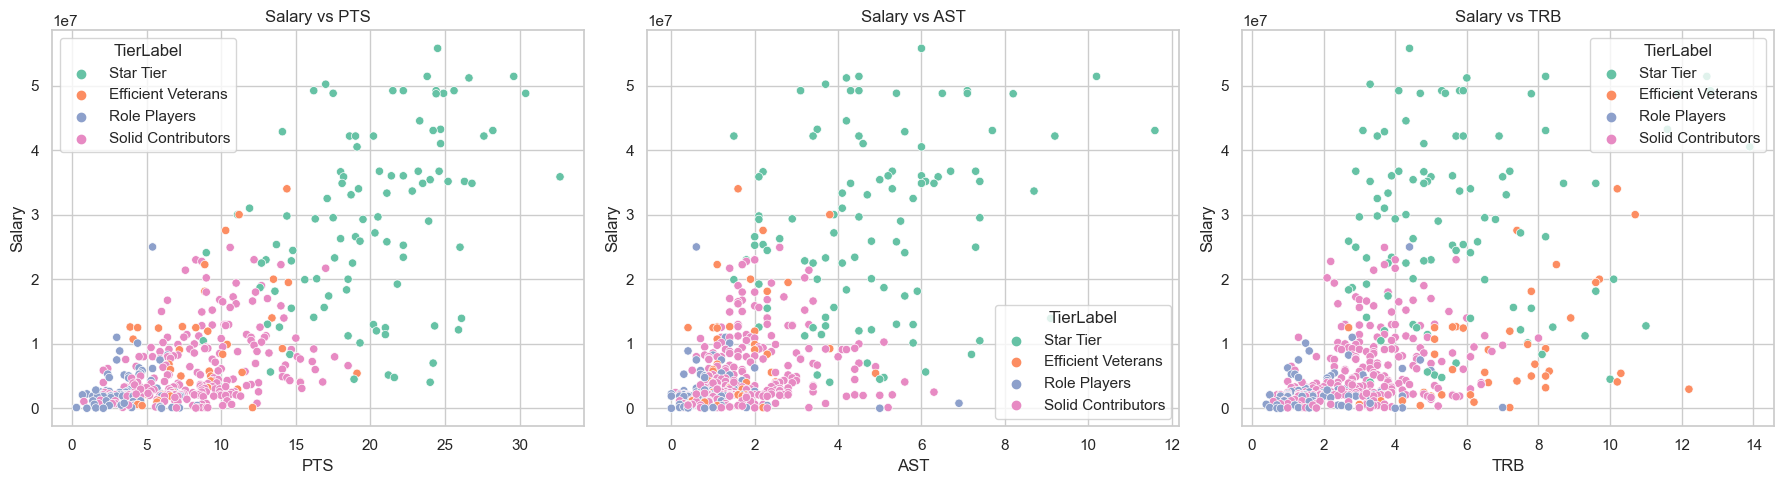

In [241]:
# Step 6: Scatter Plots for Salary vs Key Stats
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Salary vs PTS
sns.scatterplot(data=df_2025_clean, x='PTS', y='Salary', hue='TierLabel', ax=axs[0], palette='Set2')
axs[0].set_title("Salary vs PTS")

# Salary vs AST
sns.scatterplot(data=df_2025_clean, x='AST', y='Salary', hue='TierLabel', ax=axs[1], palette='Set2')
axs[1].set_title("Salary vs AST")

# Salary vs TRB
sns.scatterplot(data=df_2025_clean, x='TRB', y='Salary', hue='TierLabel', ax=axs[2], palette='Set2')
axs[2].set_title("Salary vs TRB")

plt.tight_layout()
plt.show()


In [243]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# Features and target
X = df_2025_clean[['PTS', 'AST', 'TRB', 'FG%', '3P%', 'FT%', 'Age']]
y = df_2025_clean['Salary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
print("R^2 Score:", round(r2_score(y_test, y_pred), 3))
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_pred), 2))

# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(importances)


R^2 Score: 0.729
Mean Absolute Error: 4915113.13

Feature Importance:
PTS    0.626009
Age    0.177707
AST    0.051955
TRB    0.048758
FG%    0.036668
FT%    0.032876
3P%    0.026026
dtype: float64


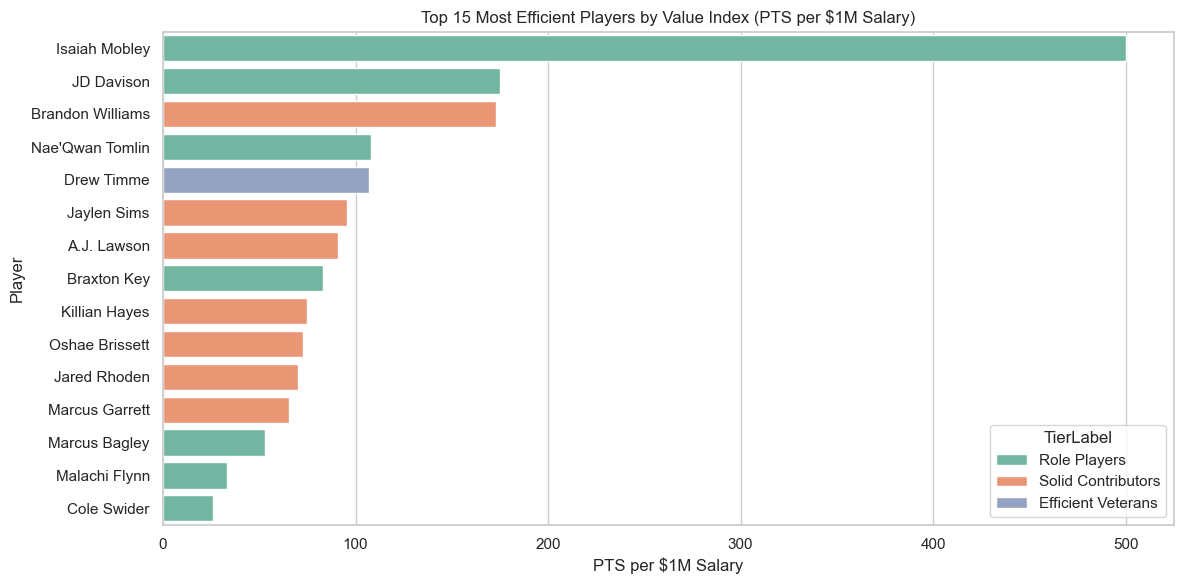

In [245]:
# Step 8: Create Value Index (PTS per $1M salary)
df_2025_clean['ValueIndex'] = (df_2025_clean['PTS'] / (df_2025_clean['Salary'] / 1e6)).round(2)

# Top 15 players by value
top_value = df_2025_clean.sort_values('ValueIndex', ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_value, x='ValueIndex', y='Player', hue='TierLabel', dodge=False, palette='Set2')
plt.title("Top 15 Most Efficient Players by Value Index (PTS per $1M Salary)")
plt.xlabel("PTS per $1M Salary")
plt.tight_layout()
plt.show()


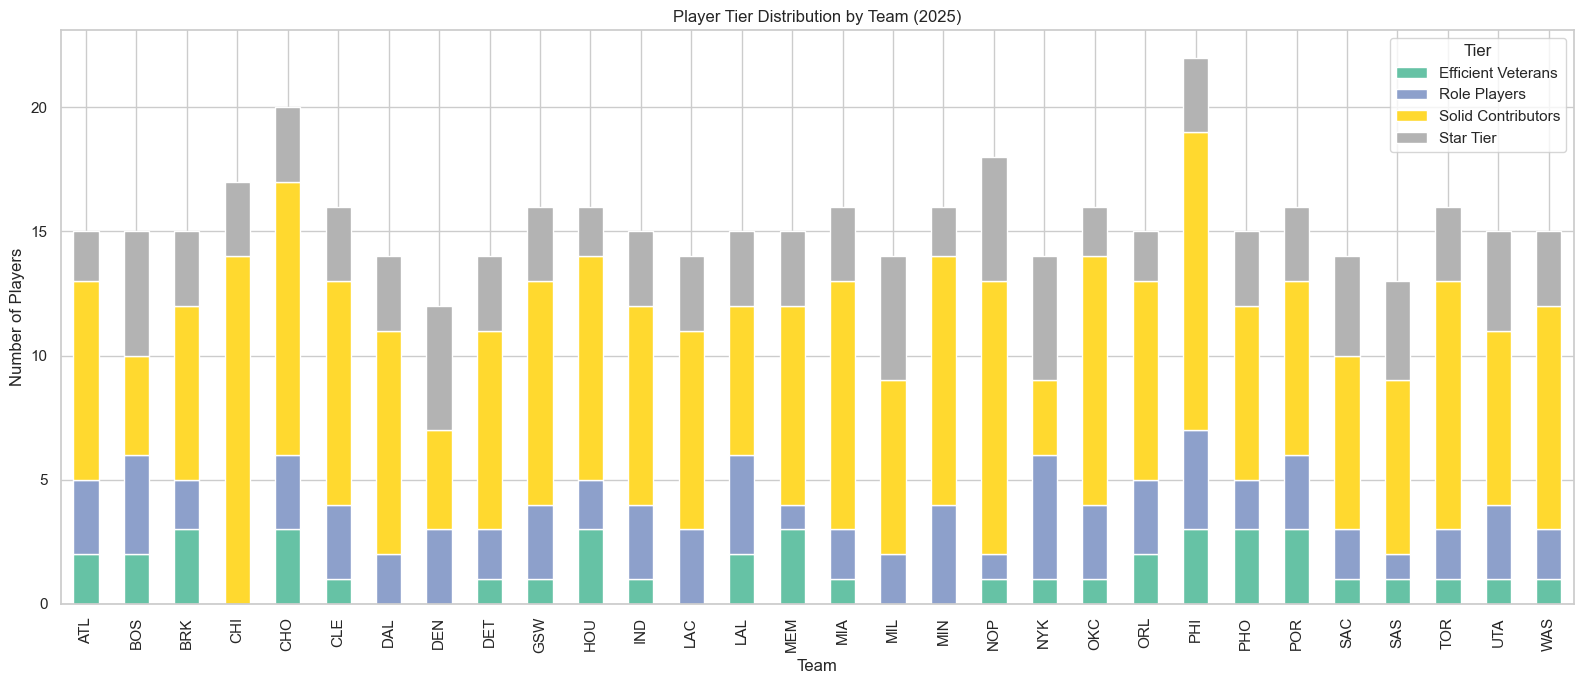

In [247]:
# Step 9: Tier Distribution by Team
tier_team = df_2025_clean.groupby(['Team', 'TierLabel']).size().unstack(fill_value=0)

# Plot stacked bar chart
tier_team.sort_index().plot(kind='bar', stacked=True, figsize=(16, 7), colormap='Set2')

plt.title("Player Tier Distribution by Team (2025)")
plt.xlabel("Team")
plt.ylabel("Number of Players")
plt.legend(title="Tier")
plt.tight_layout()
plt.show()


In [249]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Linear Regression evaluation
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Already calculated Random Forest earlier, but recap for comparison
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Print comparison
print("Model Comparison:")
print(f"Linear Regression - R²: {r2_lr:.3f}, MAE: ${mae_lr:,.2f}")
print(f"Random Forest     - R²: {r2_rf:.3f}, MAE: ${mae_rf:,.2f}")

# Show coefficients
coeffs = pd.Series(lr.coef_, index=X.columns)
print("\nLinear Regression Coefficients:")
print(coeffs.round(2))


Model Comparison:
Linear Regression - R²: 0.719, MAE: $5,906,375.94
Random Forest     - R²: 0.729, MAE: $4,915,113.13

Linear Regression Coefficients:
PTS    1241214.85
AST     519928.97
TRB     260963.29
FG%   -1791306.06
3P%   -1917914.66
FT%   -3348322.14
Age     704319.44
dtype: float64


In [256]:

# Check average stats per cluster label
cluster_summary = df_2025.groupby('Cluster')[[
    'PTS', 'AST', 'REB', 'STL', 'BLK', 'TOV',
    'FG%', '3P%', 'FT%', 'Age', 'Salary', 'Value_Index'
]].mean().round(2).sort_values(by='PTS', ascending=False)

display(cluster_summary)


KeyError: 'Cluster'

In [260]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG%', '3P%', 'FT%', 'Age']
X = df_2025[features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [262]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to the original df_2025
df_2025 = df_2025.loc[X.index].copy()  # ensure same rows
df_2025['Cluster'] = clusters


In [264]:
# Check cluster-wise average stats
cluster_stats = df_2025.groupby('Cluster')[features + ['Salary']].mean().round(2)
display(cluster_stats)


,PTS,AST,TRB,STL,BLK,TOV,FG%,3P%,FT%,Age,Salary
Cluster,,,,,,,,,,,
0,4.00,0.89,1.89,0.36,0.20,0.51,0.42,0.30,0.70,25.16,2983067.35
1,10.21,1.76,7.17,0.71,1.19,1.24,0.56,0.18,0.69,25.43,11184731.98
2,19.98,5.21,5.58,1.16,0.51,2.54,0.46,0.35,0.81,27.18,26759075.11
3,9.57,2.15,3.63,0.81,0.37,1.07,0.45,0.36,0.79,26.34,8220521.01


In [266]:
# Example — adjust based on your actual summary
tier_map = {
    2: 'Star Tier',
    1: 'Efficient Veterans',
    0: 'Solid Contributors',
    3: 'Role Players'
}

df_2025['Tier'] = df_2025['Cluster'].map(tier_map)


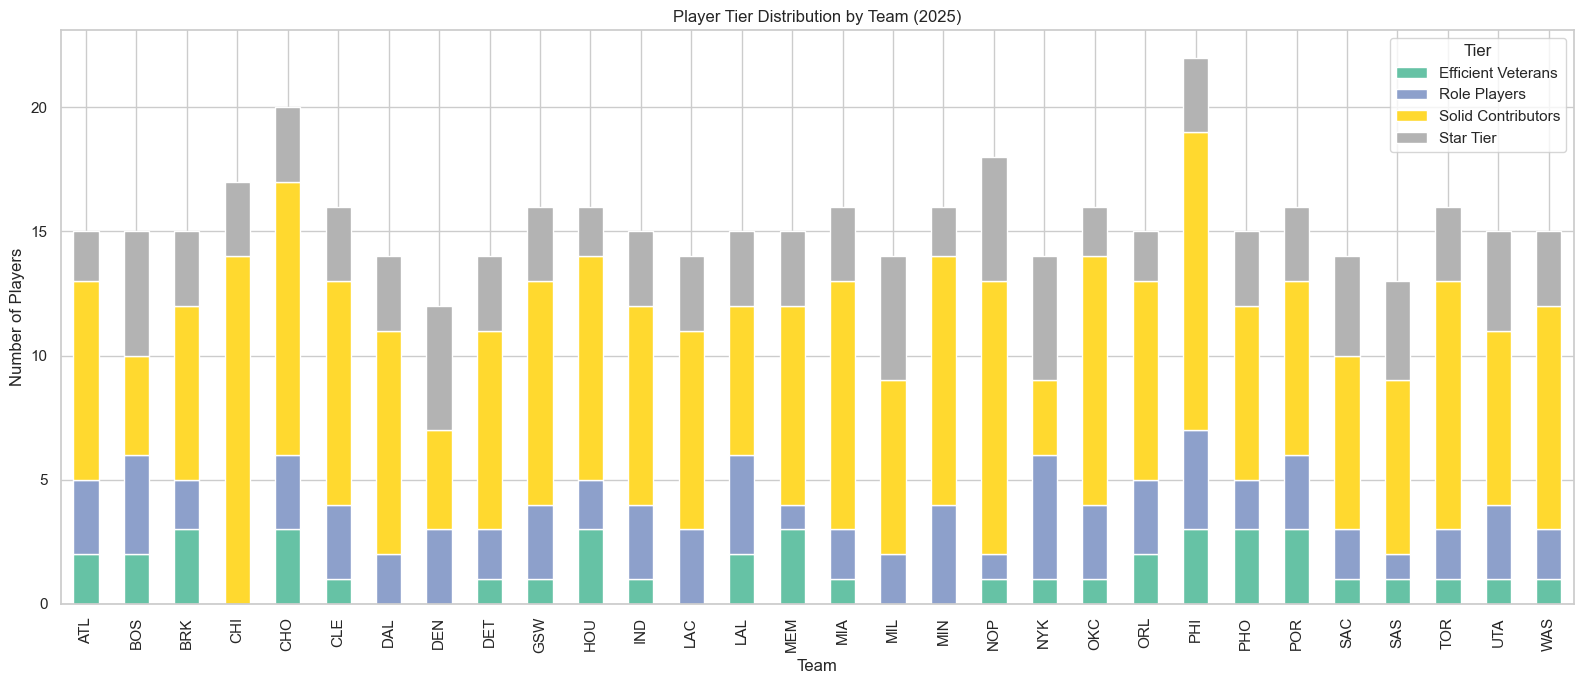

In [268]:
# Step 9: Tier Distribution by Team
tier_team = df_2025_clean.groupby(['Team', 'TierLabel']).size().unstack(fill_value=0)

# Plot stacked bar chart
tier_team.sort_index().plot(kind='bar', stacked=True, figsize=(16, 7), colormap='Set2')

plt.title("Player Tier Distribution by Team (2025)")
plt.xlabel("Team")
plt.ylabel("Number of Players")
plt.legend(title="Tier")
plt.tight_layout()
plt.show()
